In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/13793/Desktop"))

In [2]:
import ND_north_star.src.noise_generators.perlin_noise_generator as PNG
import ND_north_star.src.path_finders.voronoi as VOR


In [3]:
resolution = 30
dimensions = [resolution, resolution]

perlin_noise = PNG.normalized_perlin_data(dimensions, 4)

coord_array = perlin_noise['coordinates_list']
values = perlin_noise['values_array']

# Plot perlin noise coord in x and y coordinates and with intensity values surrounded by a black outline
PNG.plot_perlin_2D_3D(perlin_noise, 'black')


KeyboardInterrupt



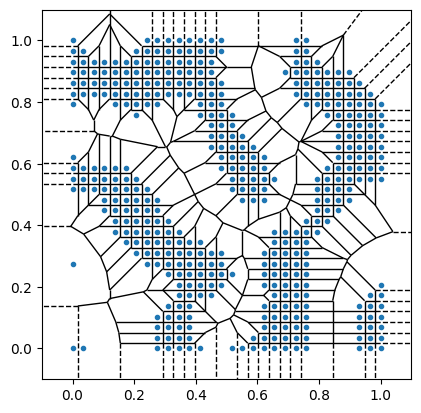

In [ ]:
VOR.voronoi_points(coord_array, values, threshold=0.5, plot=True)

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
import numpy as np
import random

def polygon_area(corners):
    n = len(corners)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area

def voronoi_finite_polygons(vor, radius=None):
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)



In [ ]:
# import matplotlib.pyplot as plt
# from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
# import numpy as np
# import random

# # ... [rest of your code, including the functions] ...

# # Example usage
# perlin_noise = PNG.normalized_perlin_data(dimensions, 4)

# coord_array = perlin_noise['coordinates_list']
# values = perlin_noise['values_array']




# vor = Voronoi(coord_array, values)
# regions, vertices = voronoi_finite_polygons(vor)
# min_area_threshold = 15  # Set a minimum area threshold

# # Compute and filter regions
# filtered_regions = []
# for region in regions:
#     polygon = vertices[region]
#     area = polygon_area(polygon)

#     # print(area)
#     if area >= min_area_threshold:
#         filtered_regions.append(region)

# # Plotting
# fig, ax = plt.subplots()
# for region in filtered_regions:
#     polygon = vertices[region]
#     ax.fill(*zip(*polygon), alpha=0.4)

# ax.plot(points[:, 0], points[:, 1], 'ko')

# # Clip the plot to the max and min of the input points
# x_min, x_max = points[:, 0].min(), points[:, 0].max()
# y_min, y_max = points[:, 1].min(), points[:, 1].max()
# ax.set_xlim(x_min, x_max)
# ax.set_ylim(y_min, y_max)

# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()


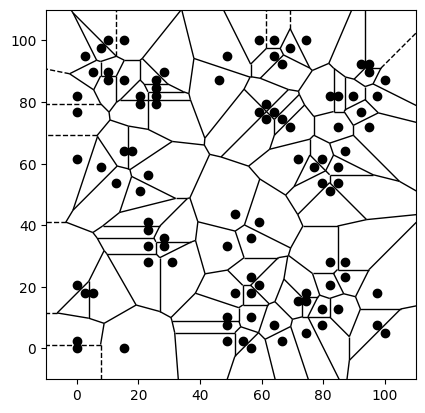

In [ ]:
# num_points_to_select = 100  # You can change this number as needed

# # Randomly select indices
# selected_indices = random.sample(range(len(points)), num_points_to_select)

# # Use the selected indices to get the selected points
# selected_points = points[selected_indices]

# # Print the selected points
# # print(selected_points)


# # Compute Voronoi diagram
# vor = Voronoi(selected_points)
# # Compute Delaunay triangulation
# tri = Delaunay(selected_points)

# # Plotting
# fig, ax = plt.subplots()
# voronoi_plot_2d(vor, ax=ax, show_vertices=False)
# ax.plot(selected_points[:, 0], selected_points[:, 1], 'ko')
# # ax.triplot(points[:, 0], points[:, 1], tri.simplices, 'go-')

# # Configure the plot
# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()



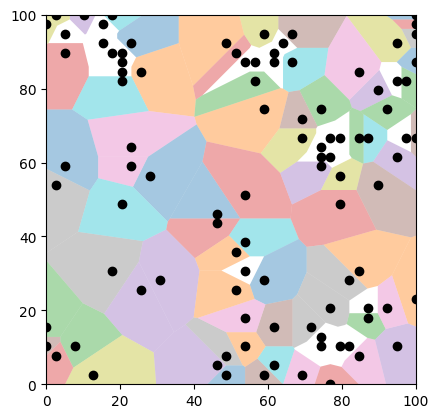

In [ ]:
# import matplotlib.pyplot as plt
# from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
# import numpy as np
# import random

# # ... [rest of your code, including the functions] ...

# # Example usage

# points = selected_points

# vor = Voronoi(points)
# regions, vertices = voronoi_finite_polygons(vor)
# min_area_threshold = 50  # Set a minimum area threshold

# # Compute and filter regions
# filtered_regions = []
# for region in regions:
#     polygon = vertices[region]
#     area = polygon_area(polygon)

#     # print(area)
#     if area >= min_area_threshold:
#         filtered_regions.append(region)

# # Plotting
# fig, ax = plt.subplots()
# for region in filtered_regions:
#     polygon = vertices[region]
#     ax.fill(*zip(*polygon), alpha=0.4)

# ax.plot(points[:, 0], points[:, 1], 'ko')

# # Clip the plot to the max and min of the input points
# x_min, x_max = points[:, 0].min(), points[:, 0].max()
# y_min, y_max = points[:, 1].min(), points[:, 1].max()
# ax.set_xlim(x_min, x_max)
# ax.set_ylim(y_min, y_max)

# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()
